In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import nltk
import warnings
%matplotlib inline


warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')

In [2]:
url = 'https://raw.githubusercontent.com/aswintechguy/Machine-Learning-Projects/master/Twitter%20Sentiment%20Analysis%20-%20NLP/Twitter%20Sentiments.csv'
df = pd.read_csv(url)
df.head(25)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
#import re

#target_string = "Numbers are 8,23, 886, 4567, 78453"
# Question mark sign(?) to match 0 or 1 repetitions
#result = re.findall(r"\d\d\d\d\d?", target_string)
#print(result)

In [ ]:
#target_str = "Jessa is a Python developer, and her salary is 8000"

# \A to match at the start of a string
# match word starts with capital letter
#result = re.findall(r"\A([A-Z].*?)\s", target_str)
#print("Matching value", result)


In [4]:
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for word in r:
        input_text = re.sub(word, "", input_text)
    return input_text
        

In [5]:
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
pd.set_option('max_columns', None)

In [9]:
#remove special character, numbers or punctuations:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df['clean_tweet'].head()


0      when a father is dysfunctional and is so sel...
1      thanks for #lyft credit i can t use cause th...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide  society now    #motivation
Name: clean_tweet, dtype: object

In [10]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'doesn', "wouldn't", 'themselves', 'there', 'between', 'couldn', 'after', 'you', "she's", 'most', 'off', 've', 'yourselves', 'her', "haven't", 'hasn', "won't", 'we', 'if', 'be', 'here', 'not', 'than', 's', 'then', 'has', "aren't", 'itself', "you'd", 'because', 'same', 'aren', 'these', 'd', 'haven', 'it', 'our', 'into', 'too', "should've", 'ain', 'ourselves', 'and', 'on', 'your', 'few', "it's", 'all', 'himself', 'no', 'that', 'weren', 'against', 'why', 'being', "couldn't", 'they', 'now', 'ma', 'needn', 'have', 'mightn', 'more', "needn't", "you've", 'down', "shouldn't", 'hadn', 'them', 'of', 'o', 'until', 'further', 'me', 'am', 'y', 'hers', 'having', 'out', "shan't", 'once', 'his', 'any', 'about', 'during', 'to', 'with', 'so', 'but', 'yours', 'this', 'only', 'him', 'herself', "mustn't", "mightn't", "hadn't", 'over', 'm', 'again', 'such', 'some', 'doing', "isn't", 'as', 'will', 'myself', "doesn't", "weren't", 'were', 'i', 'what', 'own', 'an', 'he', 'up', 'are', 'above', 'she', 'where', '

In [11]:
stopped = [w.replace("    ", " ") for w in df['clean_tweet'] if not w in stop_words]

In [12]:
stopped

['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run',
 '  thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx  #disapointed #getthanked',
 '  bihday your majesty',
 '#model   i love u take with u all the time in ur           ',
 ' factsguide  society now #motivation',
 '   huge fan fare and big talking before they leave  chaos and pay disputes when they get there  #allshowandnogo  ',
 '  camping tomorrow  danny   ',
 'the next school year is the year for exams   can t think about that   #school #exams   #hate #imagine #actorslife #revolutionschool #girl',
 'we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers   ',
 '   welcome here i m   it s so #gr ',
 '  #ireland consumer price index  mom  climbed from previous   to   in may   #blog #silver #gold #forex',
 'we are so selfish  #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love 

In [13]:
filtered = pd.Series(stopped)

In [14]:
type(filtered)

pandas.core.series.Series

In [15]:
filtered_sent=[]
for w in df['clean_tweet']:
    if w not in stop_words:
        filtered_sent.append(w)

In [16]:
filtered_sent

['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run',
 '  thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked',
 '  bihday your majesty',
 '#model   i love u take with u all the time in ur                                      ',
 ' factsguide  society now    #motivation',
 '      huge fan fare and big talking before they leave  chaos and pay disputes when they get there  #allshowandnogo  ',
 '  camping tomorrow        danny   ',
 'the next school year is the year for exams      can t think about that      #school #exams   #hate #imagine #actorslife #revolutionschool #girl',
 'we won    love the land    #allin #cavs #champions #cleveland #clevelandcavaliers      ',
 '   welcome here    i m   it s so #gr    ',
 '     #ireland consumer price index  mom  climbed from previous      to      in may   #blog #silver #gold #forex',
 'we are so selfish  #orlando #standwithorlando #pulseshoot

In [17]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))
df['clean_tweet'].head(50)

0     when father dysfunctional selfish drags kids i...
1     thanks #lyft credit cause they offer wheelchai...
2                                   bihday your majesty
3                            #model love take with time
4                        factsguide society #motivation
5     huge fare talking before they leave chaos disp...
6                                camping tomorrow danny
7     next school year year exams think about that #...
8     love land #allin #cavs #champions #cleveland #...
9                                          welcome here
10    #ireland consumer price index climbed from pre...
11    selfish #orlando #standwithorlando #pulseshoot...
12                         daddy today days #gettingfed
13    #cnn calls #michigan middle school build wall ...
14    comment #australia #opkillingbay #seashepherd ...
15         ouch junior angry #got #junior #yugyoem #omg
16            thankful having paner #thankful #positive
17                                        retwee

In [18]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())

In [19]:
type(tokenized_tweet)

pandas.core.series.Series

In [20]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [21]:
type(filtered)

pandas.core.series.Series

In [22]:
filtered = filtered.apply(lambda sentences: [stemmer.stem(word) for word in sentences.split()])

In [23]:
filtered.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can, t, use, ca...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                    [factsguid, societi, now, #motiv]
dtype: object

In [24]:
for i in range(len(filtered)):
    filtered[i] = " ".join(filtered[i])
    
    
df['clean_tweet'] = filtered
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can t use caus they d...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguid societi now #motiv


# Exploratory Data Analysis

In [ ]:
!pip install wordcloud

In [40]:
#visualize the frequent words
all_words = " ".join([sentences for sentences in df['clean_tweet']])

In [38]:
for sentences in df['clean_tweet']:
    try:
        all_words = " ".join([sentences.str.rstrip()])
    except Exception as e:
        e

In [41]:
all_words

'when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run thank for #lyft credit i can t use caus they don t offer wheelchair van in pdx #disapoint #getthank bihday your majesti #model i love u take with u all the time in ur factsguid societi now #motiv huge fan fare and big talk befor they leav chao and pay disput when they get there #allshowandnogo camp tomorrow danni the next school year is the year for exam can t think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl we won love the land #allin #cav #champion #cleveland #clevelandcavali welcom here i m it s so #gr #ireland consum price index mom climb from previou to in may #blog #silver #gold #forex we are so selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love # i get to see my daddi today # day #gettingf #cnn call #michigan middl school build the wall chant #tcot no comment in #australia #opkillingbay #seashepherd #helpcovedolp

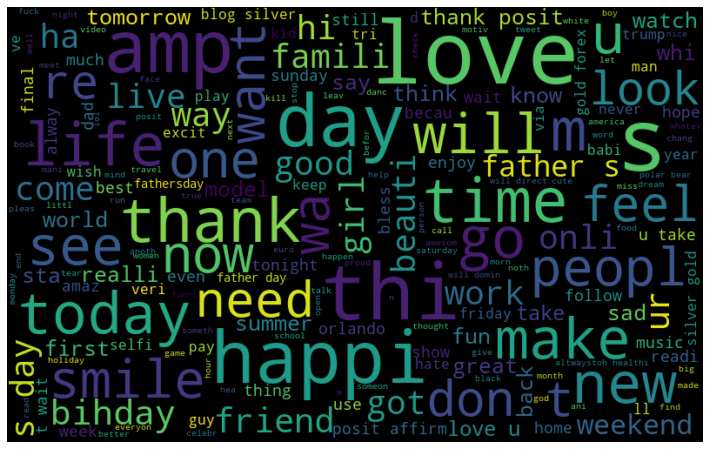

In [42]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

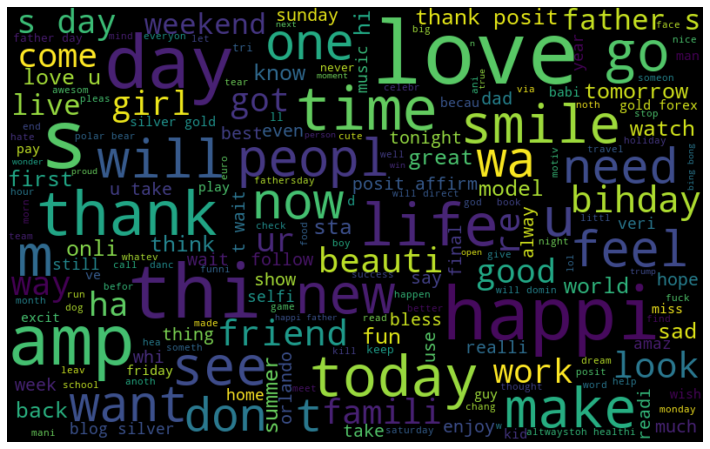

In [44]:
all_words = " ".join([sentences for sentences in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

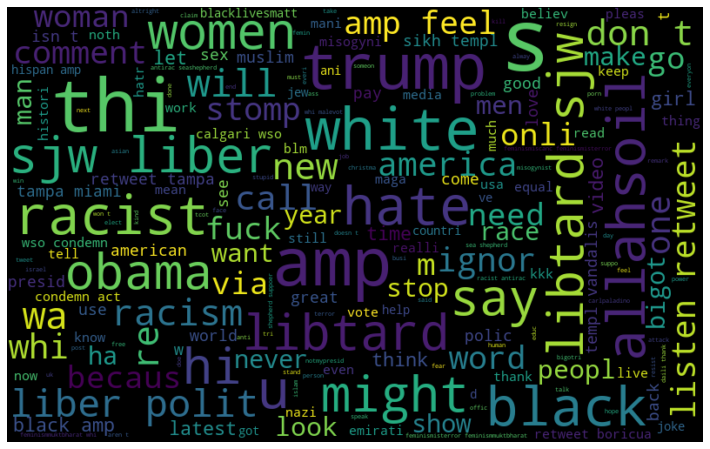

In [45]:
all_words = " ".join([sentences for sentences in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [73]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return  hashtags

In [83]:
pos = df['clean_tweet'][df['label']==0]
pos.head(50)

0     when a father is dysfunct and is so selfish he...
1     thank for #lyft credit i can t use caus they d...
2                                   bihday your majesti
3        #model i love u take with u all the time in ur
4                          factsguid societi now #motiv
5     huge fan fare and big talk befor they leav cha...
6                                   camp tomorrow danni
7     the next school year is the year for exam can ...
8     we won love the land #allin #cav #champion #cl...
9                           welcom here i m it s so #gr
10    #ireland consum price index mom climb from pre...
11    we are so selfish #orlando #standwithorlando #...
12          i get to see my daddi today # day #gettingf
15      ouch junior is angri #got #junior #yugyoem #omg
16            i am thank for have a paner #thank #posit
18    it #friday smile all around via ig user #cooki...
19    as we all know essenti oil are not made of chemic
20    #euro peopl blame ha for conced goal wa it

In [75]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [80]:
ht_positive

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'gr',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughiseno

In [77]:
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [78]:
from itertools import chain
ht_positive = list(chain.from_iterable(ht_positive))
ht_negative = list(chain.from_iterable(ht_negative))


#Can also use

#ht_postive = sum(ht_positive,[]) -->Does the sme as 'Chain'

In [79]:
ht_positive

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'gr',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughiseno

In [84]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtags':list(freq.keys()),
                 'Count': list(freq.values())})

d.head()

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


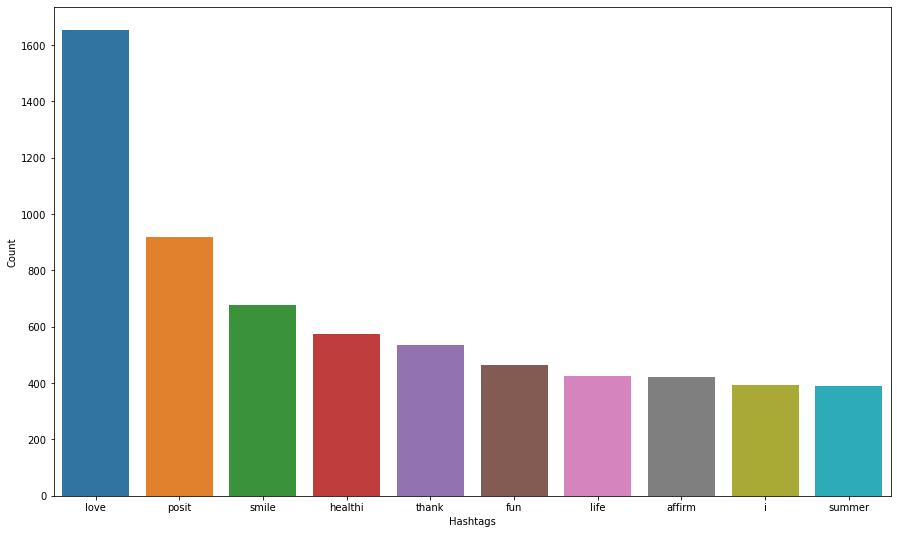

In [86]:
# select top 10 hashtags

d = d.nlargest(columns="Count", n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x="Hashtags", y="Count")
plt.show()

In [87]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtags':list(freq.keys()),
                 'Count': list(freq.values())})

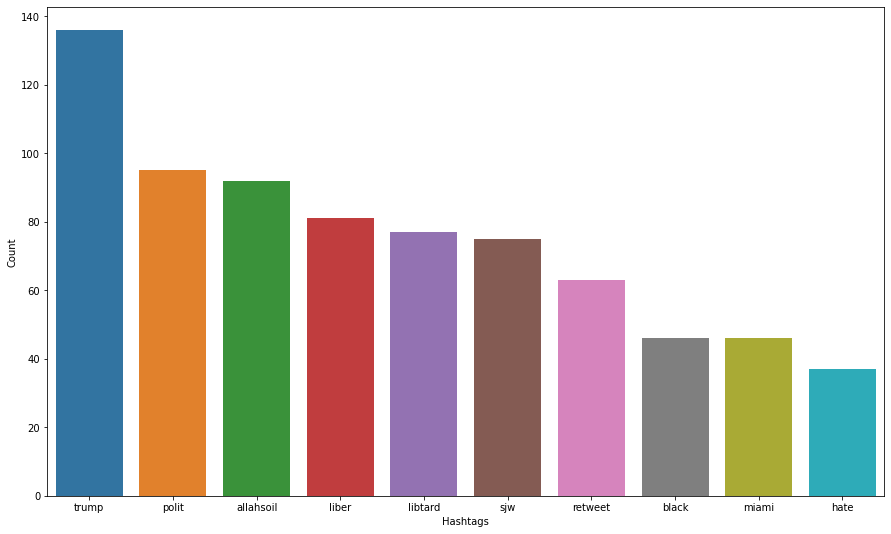

In [88]:
d = d.nlargest(columns="Count", n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x="Hashtags", y="Count")
plt.show()